# Analizando el Titanic 

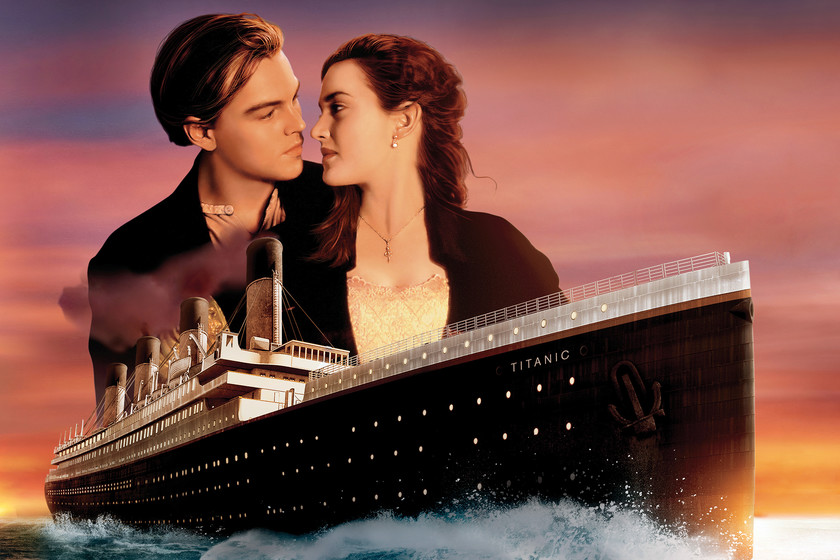

A lo largo de este Notebook, analizaremos el dataset de una de las Tragedias más grandes de la historia, EL Titanic.
Este desastre quedó retratado en la película de James Cameron, en la que se nos presenta a Rose y Jack, dos personajes ficticios, pero que al parecer están inspirados en personajes reales.

Alguna vez se preguntaron por qué Jack no se salva? Había espacio suficiente para que Rose y Jack se salvaran, podremos a partir de los datos determinar si efectivamente la decisión de James Cameron fue correcta?

In [1]:
# Librerías Principales de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importando el Dataset

In [2]:
df = pd.read_csv('Titanic.csv', index_col = 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# De qué se trata el Dataset?

> En este dataset no estan todos los pasajeros ya que es sólo una muestra.

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ¿Cuánta Gente Sobrevivió?

In [5]:
df['Survived']= np.where(df.Survived >0, 'Sobrevive', 'No Sobrevive')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,No Sobrevive,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Sobrevive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Sobrevive,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Sobrevive,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,No Sobrevive,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,No Sobrevive,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,Sobrevive,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,No Sobrevive,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df.Survived.value_counts(normalize = True)

No Sobrevive    0.616162
Sobrevive       0.383838
Name: Survived, dtype: float64

# ¿Cuántos Hombres y Mujeres hay?

In [7]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# ¿Y cuántos sobrevivieron?

In [8]:
df.groupby('Sex').Survived.value_counts(normalize = True)

Sex     Survived    
female  Sobrevive       0.742038
        No Sobrevive    0.257962
male    No Sobrevive    0.811092
        Sobrevive       0.188908
Name: Survived, dtype: float64

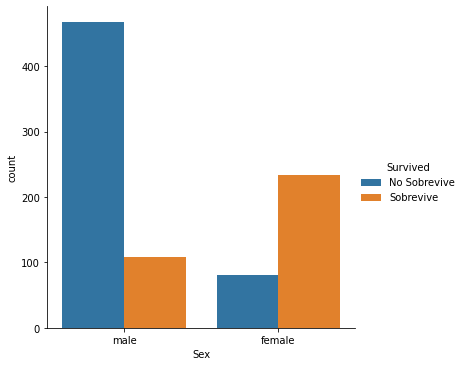

In [9]:
sns.catplot(x = 'Sex', hue = 'Survived', data = df, kind = 'count')

# ¿Cuánta Gente por Clase?

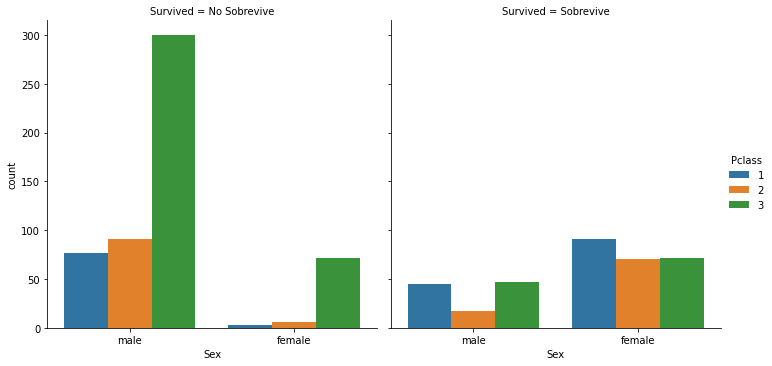

In [10]:
sns.catplot(x = 'Sex', hue = 'Pclass', data = df, kind = 'count', col = 'Survived')

# ¿Cuanto pagaba cada clase? 

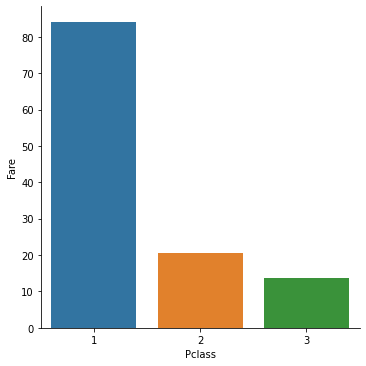

In [11]:
sns.catplot(x = 'Pclass', y = 'Fare', data = df, kind = 'bar', estimator = np.mean, ci = None)

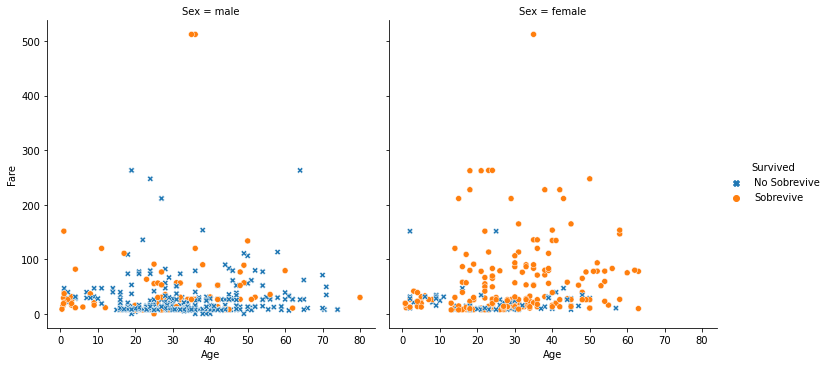

In [12]:
sns.relplot(x = 'Age', y = 'Fare', data = df, style = 'Survived', style_order = ['Sobrevive', 'No Sobrevive'] , hue = 'Survived', col = 'Sex')

# Extracción de Variables

Muchas veces los datos no vienen listos para usarse, y hay veces que es necesario hacer transformaciones para rescatar información útil. Para ello, extraeremos el título de cada persona a partir del nombre.

In [13]:
df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [14]:
df['Title'] = [n.split(', ')[1].split('.')[0] for n in df.Name]

In [15]:
df.groupby('Title').Survived.value_counts()

Title         Survived    
Capt          No Sobrevive      1
Col           No Sobrevive      1
              Sobrevive         1
Don           No Sobrevive      1
Dr            No Sobrevive      4
              Sobrevive         3
Jonkheer      No Sobrevive      1
Lady          Sobrevive         1
Major         No Sobrevive      1
              Sobrevive         1
Master        Sobrevive        23
              No Sobrevive     17
Miss          Sobrevive       127
              No Sobrevive     55
Mlle          Sobrevive         2
Mme           Sobrevive         1
Mr            No Sobrevive    436
              Sobrevive        81
Mrs           Sobrevive        99
              No Sobrevive     26
Ms            Sobrevive         1
Rev           No Sobrevive      6
Sir           Sobrevive         1
the Countess  Sobrevive         1
Name: Survived, dtype: int64

# Machine Learning Time

Siempre pensé que Jack no debía morir, pero estuvo correcta la decisión de James Cameron? Para responder eso, utilizaremos la data del titanic para efectivamente determinar si correspondía que Jack muriera o debía sobrevivir.

> Si no tienes category_encoders instalado te recomiendo instalarlo descomentando la celda de abajo.

In [16]:
#!pip install category_encoders
# Opcionalmente pueden instalar 

In [17]:
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import set_config
set_config(display = 'diagram')

# Eligiendo variables 

In [18]:
X = df[['Pclass','Embarked','Sex','Title','SibSp','Parch','Fare','Age']]
y = df.Survived

# Data Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

# Entendiendo el Tipo de Dato

In [20]:
X_train.dtypes

Pclass        int64
Embarked     object
Sex          object
Title        object
SibSp         int64
Parch         int64
Fare        float64
Age         float64
dtype: object

In [21]:
pass_var = X_train[['Pclass']].columns
is_cat = X_train[['Embarked','Sex','Title']].columns
is_num = X_train.select_dtypes(np.number).drop(columns = 'Pclass').columns

# Creando el Modelo

In [22]:
num = Pipeline(steps = [
    ('imp_num', SimpleImputer(strategy = 'mean')),
    ('sc', StandardScaler())
])

cat = Pipeline(steps = [
    ('imp_cat', SimpleImputer(strategy = 'most_frequent')),
    ('ord', OrdinalEncoder())
])

prep = ColumnTransformer(transformers = [
    ('pass', 'passthrough', pass_var),
    ('num', num, is_num),
    ('cat', cat, is_cat)
])

pipe = Pipeline(steps = [
    ('prep', prep),
    ('model', DecisionTreeClassifier(random_state = 123, ccp_alpha = 0.01))
])

pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pass', 'passthrough',
                                                  Index(['Pclass'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imp_num',
                                                                   SimpleImputer()),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  Index(['SibSp', 'Parch', 'Fare', 'Age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imp_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder())]),
                                                  Index(['Embarked', 'Sex', 'Title'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.01, random_state=123))])

# Visualizando los Resultados del Modelo

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pass', 'passthrough',
                                                  Index(['Pclass'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imp_num',
                                                                   SimpleImputer()),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  Index(['SibSp', 'Parch', 'Fare', 'Age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imp_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder())]),
                                                  Index(['Embarked', 'Sex', 'Title'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.01, random_state=123))])

In [24]:
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

No Sobrevive       0.86      0.84      0.85       114
   Sobrevive       0.74      0.77      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



# Predigamos la Supervivencia de Jack y Rose

![](titanic.png)

![](rose_dewitt.png)

![](jack_dawson.png)

In [25]:
X_train.columns

Index(['Pclass', 'Embarked', 'Sex', 'Title', 'SibSp', 'Parch', 'Fare', 'Age'], dtype='object')

In [26]:
data = pd.DataFrame([[3,'S','male','Mr',0,0,0,22],[1,'S','female','Lady',0,1,250,17]], columns = X_train.columns)
data

,Pclass,Embarked,Sex,Title,SibSp,Parch,Fare,Age
0,3,S,male,Mr,0,0,0,22
1,1,S,female,Lady,0,1,250,17


In [27]:
pipe.predict(data)

array(['No Sobrevive', 'Sobrevive'], dtype=object)